In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from wordcloud import WordCloud
import os
from os import path

In [10]:
terror = pd.read_excel('./global_terrorism_database.xlsx')
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [62]:
NA = ['United States', 'Mexico' ,'Canada', 'Guatemala', 'Cuba', 'The Dominican Republic', 'Haiti', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Jamaica', 'Trinidad and Tobago', 'The Bahamas', 'Belize', 'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Grenada', 'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis']
NA_decade_dict = {'1970-79': 0, '1980-89': 0, '1990-99': 0, '2000-09': 0, '2010-17': 0}
for index, row in terror.iterrows():
    if row['country_txt'] in NA:
        year = row['iyear']
        if year >= 1970 and year <= 1979:
            year_key = '1970-79'
        elif year >= 1980 and year <= 1989:
            year_key = '1980-89'
        elif year >= 1990 and year <= 1999:
            year_key = '1990-99'
        elif year >= 2000 and year <= 2009:
            year_key = '2000-09'
        elif year >= 2010 and year <= 2017:
            year_key = '2010-17'
        NA_decade_dict[year_key] += 1
        
NA_decade_dict

{'1970-79': 2500,
 '1980-89': 7951,
 '1990-99': 2451,
 '2000-09': 328,
 '2010-17': 404}

(array([2., 2., 0., 0., 1.]),
 array([ 328. , 1852.6, 3377.2, 4901.8, 6426.4, 7951. ]),
 <a list of 5 Patch objects>)

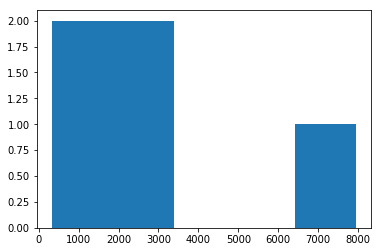

In [73]:
# plt.figure(figsize = (15, 8))
# plt.bar(NA_decade_dict.keys(), NA_decade_dict.values())
# plt.xlabel('Per 10 Year (Decade)')
# plt.ylabel('Terror Attacks')
# plt.title('Terror Attacks in North America v/s Decade')
# for x, y in zip(NA_decade_dict.keys(), NA_decade_dict.values()):
#     plt.text(x, y, str(y))

plt.hist(NA_decade_dict.values(), bins = 5)

### As seen from above plot, the decade `1980 - 1989` witnessed maximum number of terror attacks.

In [83]:
year_dict = {}
for index, row in terror.iterrows():
    year = str(row['iyear'])
    if year not in year_dict.keys():
        year_dict[year] = 1
    else:
        year_dict[year] += 1

year_dict

{'1970': 651,
 '1971': 471,
 '1972': 568,
 '1973': 473,
 '1974': 581,
 '1975': 740,
 '1976': 923,
 '1977': 1319,
 '1978': 1526,
 '1979': 2662,
 '1980': 2662,
 '1981': 2586,
 '1982': 2544,
 '1983': 2870,
 '1984': 3495,
 '1985': 2915,
 '1986': 2860,
 '1987': 3183,
 '1988': 3721,
 '1989': 4324,
 '1990': 3887,
 '1991': 4683,
 '1992': 5071,
 '1994': 3456,
 '1995': 3081,
 '1996': 3058,
 '1997': 3197,
 '1998': 934,
 '1999': 1395,
 '2000': 1814,
 '2001': 1906,
 '2002': 1333,
 '2003': 1278,
 '2004': 1166,
 '2005': 2017,
 '2006': 2758,
 '2007': 3242,
 '2008': 4805,
 '2009': 4721,
 '2010': 4826,
 '2011': 5076,
 '2012': 8522,
 '2013': 12036,
 '2014': 16903,
 '2015': 14965,
 '2016': 13587,
 '2017': 10900}

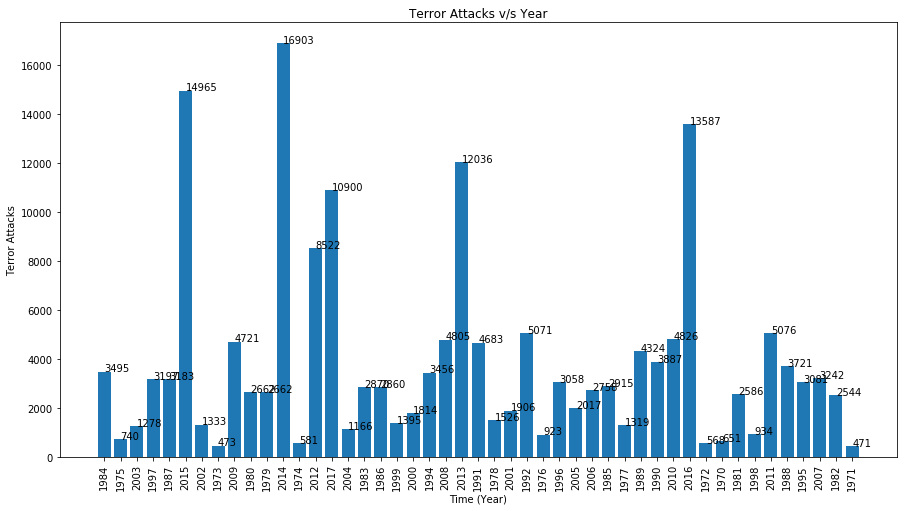

In [85]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(year_dict.keys(), year_dict.values())
plt.xlabel('Time (Year)')
plt.ylabel('Terror Attacks')
plt.title('Terror Attacks v/s Year')
for x, y in zip(year_dict.keys(), year_dict.values()):
    plt.text(x, y, str(y))

### From the plot above, it's clear that the year `2014` experieced most terror attacks.

In [88]:
most_year_terror_data = terror[terror['iyear'] == 2014]
country_dict = {}
for index, row in most_year_terror_data.iterrows():
    country = row['country_txt']
    if country not in country_dict.keys():
        country_dict[country] = 1
    else:
        country_dict[country] += 1

country_dict

{'Afghanistan': 1824,
 'Albania': 2,
 'Algeria': 13,
 'Argentina': 1,
 'Australia': 8,
 'Azerbaijan': 3,
 'Bahrain': 42,
 'Bangladesh': 130,
 'Belgium': 2,
 'Bhutan': 1,
 'Bosnia-Herzegovina': 3,
 'Brazil': 3,
 'Bulgaria': 1,
 'Burundi': 5,
 'Cameroon': 68,
 'Canada': 3,
 'Central African Republic': 94,
 'Chad': 1,
 'Chile': 17,
 'China': 37,
 'Colombia': 231,
 'Cyprus': 5,
 'Czech Republic': 5,
 'Democratic Republic of the Congo': 110,
 'Djibouti': 1,
 'Dominican Republic': 1,
 'Egypt': 354,
 'Ethiopia': 2,
 'France': 14,
 'Georgia': 2,
 'Germany': 13,
 'Ghana': 1,
 'Greece': 26,
 'Honduras': 1,
 'Hungary': 1,
 'Iceland': 1,
 'India': 860,
 'Indonesia': 35,
 'Iran': 9,
 'Iraq': 3933,
 'Ireland': 33,
 'Israel': 293,
 'Italy': 7,
 'Ivory Coast': 1,
 'Jamaica': 1,
 'Japan': 5,
 'Jordan': 3,
 'Kenya': 115,
 'Kosovo': 4,
 'Kyrgyzstan': 2,
 'Lebanon': 204,
 'Liberia': 1,
 'Libya': 728,
 'Macedonia': 3,
 'Madagascar': 1,
 'Malaysia': 12,
 'Maldives': 9,
 'Mali': 69,
 'Malta': 1,
 'Mexico': 5

In [104]:
with open('wordcloud.txt', 'w') as file:
    for index, row in terror.iterrows():
        text = row['addnotes']
        if type(text) is float:
            continue
        file.write(text)

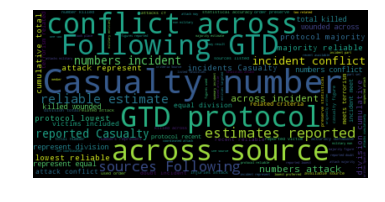

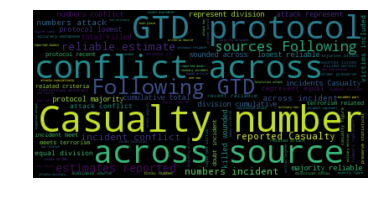

In [107]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'wordcloud.txt')).read()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=70).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()